<a href="https://colab.research.google.com/github/SilverSurferClash/Sales_analysis/blob/main/Import_clean_SFDC_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [527]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [528]:
#!pip freeze > requirements.txt

In [529]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('dark_background')
import seaborn as sns
import os
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 2)
#Use option to round floats to two decimals
#pd.set_option('display.float_format',  '{:,.2f}'.format)
# Use option to display $ dollars
#pd.set_option('display.float_format', '${:.2f}'.format)

# Plotting pretty figures and avoid blurry images
#%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
#sns.set_context('notebook')


# Enable multiple cell outputs
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')              


In [530]:
os.getcwd()

'/content/drive/My Drive/Colab_Notebooks/November_2022'

In [531]:
os.chdir("/content/drive/MyDrive/Colab_Notebooks/November_2022")

#### Helper function

In [532]:
#Create a function that use the second element if the list has a length of 2 other return unknown

def clean_up_account(list_of_names):

  if len(list_of_names) == 2:
    return list_of_names[1]
  else:
    return list_of_names[0]





In [533]:
#Create a function to clean up the Billing type feature


Import helper data

In [534]:
#Import lookup table for countries
lookup_countries = pd.read_excel("./lookup.xlsx", sheet_name = 0)
#Import the data from SFDC as a excel file
import_sfdc = pd.read_excel("./Prospective.xlsx", sheet_name = 0, 
                            skiprows = 10)
#Create dictionairy for maping the lookup value
country_dict = dict(zip(lookup_countries["Reporting_Country_short"], lookup_countries["Account_Reporting_Country"]))
#Import lookup table for countries
lookup_type = pd.read_excel("./lookup.xlsx", sheet_name = "Type")
#Create dictionairy for maping the lookup values for LIMS ID
type_dict = dict(zip(lookup_type["LIMS Project ID"], lookup_type["Type"]))
#Dictionaire for AE support countries 
AE_dict = { 'CANADA': "AE", "SPAIN" : "AE", "UNITED KINGDOM" : "AE", "BRAZIL" : "AE", "TURKEY" : "AE", "IRELAND" : "AE"}
#Import lookup Cancer Type
lookup_cancer_type = pd.read_excel("./lookup.xlsx", sheet_name = "Cancer_type")
cancer_type_dict = dict(zip(lookup_cancer_type["Old"], lookup_cancer_type["New"]))

#Inport lookun Billing_type - Needs further work
#lookup_billing_type = pd.read_excel("./lookup.xlsx", sheet_name = "Billing_type")
#billing_type_dict = dict(zip(lookup_billing_type["Billing Type"], lookup_billing_type["Billing Type.1"]))


In [535]:
import_sfdc

,Unnamed: 0,Accession #,Unnamed: 2,Reporting Country,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Date Received,Final Report Date,Test Type,Cancer Type
0,NaN,A0214386,NaN,CH,Pharma : ROW,AMG_01,AMG_01: Universitatsspital Zurich,Alessandra Curioni Fontecedro,11/25/2019,NaN,Guardant 360,Lung adenocarcinoma
1,NaN,A0214865,NaN,CA,Pharma : ROW,AMG_01,AMG_01: Princess Margaret Cancer Centre,Adrian Sacher,11/26/2019,NaN,Guardant 360,Lung adenocarcinoma
2,NaN,A0215878,NaN,BE,Pharma : ROW,AMG_01,AMG_01: Universitair Ziekenhuis Antwerpen,Hans Prenen,11/29/2019,NaN,Guardant 360,Lung adenocarcinoma
3,NaN,A0215958,NaN,DE,Pharma : US,AMG_01,AMG_01: Universitatsklinikum Koln,Wolf Juergen,11/30/2019,NaN,Guardant 360,Lung adenocarcinoma
4,NaN,A0215959,NaN,DE,Pharma : ROW,AMG_01,AMG_01: Universitatsklinikum Koln,Wolf Juergen,11/30/2019,NaN,Guardant 360,Lung adenocarcinoma
...,...,...,...,...,...,...,...,...,...,...,...,...
15751,NaN,Total,Count,15751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15754,NaN,Confidential Information - Do Not Distribute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [536]:
#Identify which LIMS id are not in the lookup
unique_LIMS_id = list(set(import_sfdc["LIMS Project ID"]))
unique_lookup_id = list(set(lookup_type["LIMS Project ID"]))
list(set(unique_LIMS_id) - set(unique_lookup_id ))

[nan,
 'TRM_01',
 'OCT_1R',
 'RHI_04',
 'GAP_04',
 'AZN_test_96',
 'JNJ_32_EU',
 'GAP_09',
 'JNS_01']

In [537]:
#import_sfdc.info()

#### Import and clean up the data from SFDC

In [538]:

#Remove the first two columns
import_sfdc = import_sfdc.drop(["Unnamed: 0", "Unnamed: 2"], axis = 1)
#Drop the last five rows
import_sfdc = import_sfdc.iloc[0:-5]
#Cast Date Received to datetime object 
import_sfdc["Date Received"] = pd.to_datetime(import_sfdc["Date Received"])
#Clean up the type column
import_sfdc["Type"] = import_sfdc["LIMS Project ID"].map(type_dict)

#Replace the two letter country code with the full country name
import_sfdc["Reporting Country"] = import_sfdc["Reporting Country"].map(country_dict)
#Clean up the cancer types and reduce number of categories
import_sfdc["Cancer Type"] = import_sfdc["Cancer Type"].map(cancer_type_dict)
#Clean up the Account column by removing all strings before the ":"
import_sfdc["Account: Account Name"] = import_sfdc.loc[:, "Account: Account Name"].str.split(":").apply(clean_up_account)

#Clean up the Billing type column 
#import_sfdc["Billing Type"] = import_sfdc["Billing Type"].map(billing_type_dict)
#import_sfdc.tail(6)

# Set the date recieved as date index
import_sfdc = import_sfdc.set_index("Date Received")

#import_sfdc.info()

In [539]:
#df[“column_name”] = np.where(df[“column_name”]==”some_value”, value_if_true, value_if_false)
import_sfdc["AE_supported"] = np.where(import_sfdc["Reporting Country"].isin(AE_dict.keys()), "AE", "non_AE")

In [540]:
import_sfdc

,Accession #,Reporting Country,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported
Date Received,,,,,,,,,,,
2019-11-25,A0214386,SWITZERLAND,Pharma : ROW,AMG_01,Universitatsspital Zurich,Alessandra Curioni Fontecedro,NaN,Guardant 360,NaN,Biopharma,non_AE
2019-11-26,A0214865,CANADA,Pharma : ROW,AMG_01,Princess Margaret Cancer Centre,Adrian Sacher,NaN,Guardant 360,NaN,Biopharma,AE
2019-11-29,A0215878,BELGIUM,Pharma : ROW,AMG_01,Universitair Ziekenhuis Antwerpen,Hans Prenen,NaN,Guardant 360,NaN,Biopharma,non_AE
2019-11-30,A0215958,GERMANY,Pharma : US,AMG_01,Universitatsklinikum Koln,Wolf Juergen,NaN,Guardant 360,NaN,Biopharma,non_AE
2019-11-30,A0215959,GERMANY,Pharma : ROW,AMG_01,Universitatsklinikum Koln,Wolf Juergen,NaN,Guardant 360,NaN,Biopharma,non_AE
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-06,A0318002,UNITED KINGDOM,Research : ROW,VLT_01,VLT_01-Royal Brompton Hospital,RS-Eric Lim,NaN,LUNAR1_3,NaN,Lunar,AE
2021-01-11,A0319936,UNITED KINGDOM,Research : ROW,VLT_01,VLT_01-Royal Brompton Hospital,RS-Eric Lim,NaN,LUNAR1_3,NaN,Lunar,AE
2021-01-11,A0319935,UNITED KINGDOM,Research : ROW,VLT_01,VLT_01-Royal Brompton Hospital,RS-Eric Lim,NaN,LUNAR1_3,NaN,Lunar,AE


In [541]:
import_sfdc["LIMS Project ID"]

Date Received
2019-11-25    AMG_01
2019-11-26    AMG_01
2019-11-29    AMG_01
2019-11-30    AMG_01
2019-11-30    AMG_01
               ...  
2021-01-06    VLT_01
2021-01-11    VLT_01
2021-01-11    VLT_01
2021-01-15    VLT_01
2021-01-20    VLT_01
Name: LIMS Project ID, Length: 15751, dtype: object

In [542]:
#Create date and time features

#Create a year, month, quarter variable
import_sfdc["Month"] = import_sfdc.index.month
import_sfdc["Year"] = import_sfdc.index.year
import_sfdc['Quarter'] = import_sfdc.index.quarter
#Other feature engineering based on feature analysis below
import_sfdc['Sales'] = 1

#create a Year Month columns
import_sfdc['Year_Month'] = import_sfdc.index.to_period('M')
#Cast the Year_Month column to a str
import_sfdc['Year_Month'] = import_sfdc['Year_Month'].astype(str)
import_sfdc['Year_Month'] = pd.to_datetime(import_sfdc['Year_Month'])
#Cast some features to categorical
#df['Reporting_Country'] = df['Reporting_Country'].astype('category')
import_sfdc['Type'] = import_sfdc['Type'].astype('category')


In [543]:
#import_sfdc.sample(5)

#### Explore the data

In [544]:
#import_sfdc["Reporting Country"].value_counts()

In [545]:
#import_sfdc.Type.value_counts()

In [546]:
#import_sfdc.info()

In [547]:
#import_sfdc["Billing Type"].value_counts()

In [548]:
#import_sfdc["Test Type"].value_counts()

In [549]:
#import_sfdc["Cancer Type"].value_counts()

In [550]:
#import_sfdc['Billing Type'].value_counts()

In [551]:
os.getcwd()

'/content/drive/MyDrive/Colab_Notebooks/November_2022'

In [552]:
# Import the revenue data

revenue_import = pd.read_excel("./Sales_Volume_EUAA_Analytics_Oct_22.xlsx", skiprows = 28)
revenue_import = revenue_import.iloc[:, 1:12]
#revenue_import.columns.tolist()
revenue_import['Accession #']= revenue_import['Accession #'].fillna("missing") 
revenue_import = revenue_import[revenue_import['Accession #'].str.startswith("A0")]
#revenue_import.info()

In [553]:
#revenue_import.columns.tolist()

In [554]:
revenue_col_list = ['Accession #', 'Invoiced Ammount','Expected Amount $','Invoiced/In Prg.', 'FOC']

In [555]:
#Define the clean up function for the FOC columns
def foc_clean_up(value):

  if value == "x":
    return "Free"

  elif value == "x (COV19)":
     return "Free"
  elif value == "x (Christie)":
    return "Free"
  else: 
    return value

#Clean up Docuten

def docuten_clean_up(value):

  if value == "y (DOCUTEN)":
    return "Free"

  else: 
    return value

#Clean up the revenue data and extract the free of charge information
revenue_import_clean = revenue_import.loc[:, revenue_col_list].copy()
revenue_import_clean["FOC"] = revenue_import_clean["FOC"].fillna("Paid")
revenue_import_clean.head()

,Accession #,Invoiced Ammount,Expected Amount $,Invoiced/In Prg.,FOC
0,A0198807,0.0,0.0,NaN,x
1,A0196311,0.0,0.0,NaN,x
3,A0196102,3490.0,3490.0,NaN,Paid
4,A0195058,3490.0,3490.0,NaN,Paid
6,A0196290,3490.0,3490.0,NaN,Paid


In [556]:
#revenue_import_clean["FOC"].value_counts()

In [557]:
revenue_import_clean["FOC"] = revenue_import_clean["FOC"].apply(foc_clean_up).astype("category")

In [558]:
revenue_import_clean["FOC"].value_counts()

Paid    3016
Free     736
           1
Name: FOC, dtype: int64

In [559]:
#Join the two dataframes

df_merged = import_sfdc.merge(revenue_import_clean[["Accession #", "FOC"]], how='inner', on = "Accession #")
df_merged.sample(3)

,Accession #,Reporting Country,Billing Type,LIMS Project ID,Account: Account Name,Contact: Full Name,Final Report Date,Test Type,Cancer Type,Type,AE_supported,Month,Year,Quarter,Sales,Year_Month,FOC
1511,A0353672,BRAZIL,Self-Pay Patient,GHI_01,"Murad, Casali E Carneiro Ltda",Juliana Garcia Carneiro,5/11/2021,Guardant 360,NaN,Commercial,AE,5,2021,2,1,2021-05-01,Paid
70,A0214385,BRAZIL,Distributors : ROW,GHI_01,Hospital Sirio Libanes,Marcelo Rocha de Souza Cruz,12/4/2019,Guardant 360,Other,Commercial,AE,11,2019,4,1,2019-11-01,Free
3347,A0547837,UNITED KINGDOM,Self-Pay Patient,GHI_19,The Royal Marsden Hospital,Michael Davidson,7/29/2022,Guardant360 CDx EU,NaN,Commercial,AE,7,2022,3,1,2022-07-01,Paid


In [560]:
# Startinf dataframe for all years
#import_sfdc.info()

In [561]:
#Cleaned up dataframe included FOC information starting from around 2019
#df_merged.info()

#### Plotting

In [562]:
#Select the features for the analysis
import_sfdc.columns.to_list()
list_for_country_analysis = ['Accession #',
 'Reporting Country',
 'Type',
 'Sales',
 'Year_Month']

countries_df = import_sfdc.loc[:,list_for_country_analysis ]
#countries_df["Reporting Country"] = countries_df["Reporting Country"].astype('category')
countries_df.sample(3)

,Accession #,Reporting Country,Type,Sales,Year_Month
Date Received,,,,,
2022-09-30,A0584664,ITALY,Lunar,1,2022-09-01
2021-09-30,A0406511,TURKEY,Commercial,1,2021-09-01
2021-03-25,A0340874,SPAIN,GAP,1,2021-03-01


In [563]:
#Starting df for plotting
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15751 entries, 2019-11-25 to 2021-01-20
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Accession #        15751 non-null  object        
 1   Reporting Country  15751 non-null  object        
 2   Type               15633 non-null  category      
 3   Sales              15751 non-null  int64         
 4   Year_Month         15751 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(1), object(2)
memory usage: 630.9+ KB


In [564]:
#Plot the total number of by country over time

In [565]:
#Select the time horizion to analyse
start_date = "2018"
end_date = "2022-10"
#Select the # of countries to be analyses based on the maxiumum number of samplesin 
#the time horizon
num_countries = 6
#Create the dataframe relevant for the time periode which should be analysed
countries_df = countries_df.loc[start_date:end_date].copy()
print(f"The total number of samples in this dataframe is {countries_df.shape[0]}")

The total number of samples in this dataframe is 15522


In [566]:
#Create a dataframe with just the topx countries by number of tests sold
top_x = countries_df.groupby('Reporting Country').sum().sort_values("Sales",ascending = False).head(num_countries)
top_x_list = top_x.index.tolist()
top_x_sales =countries_df[countries_df['Reporting Country'].isin(top_x_list)]
print(f"The top {num_countries} countries have {top_x_sales.shape[0]} samples which represents {top_x_sales.shape[0]/countries_df.shape[0]:.2%}")

The top 6 countries have 12696 samples which represents 81.79%


In [567]:
#Starting dataframe for plotting with date defined and the number of countries
#top_x_sales.info()

In [568]:
#Merging the GH trials and LUNAR into ISTs

def merge_ISTs(x):
  if x == "GH Trials (Prospective)":
    return "ISTs"
  elif x == "Lunar":
    return "ISTs"
  else:
    return x

In [569]:
top_x_sales["Type"] = top_x_sales["Type"].map(merge_ISTs)

top_x_sales["Type"].value_counts()

Biopharma     4730
Commercial    3198
ISTs          2876
GAP           1785
Name: Type, dtype: int64

In [570]:
all_countries_by_type = top_x_sales.groupby(['Year_Month', "Type"]).sum().reset_index()
all_countries_by_type.head(3)

,Year_Month,Type,Sales
0,2019-01-01,Biopharma,105
1,2019-01-01,Commercial,26
2,2019-01-01,ISTs,76


In [571]:
all_countries_by_type.shape

(177, 3)

In [572]:
all_countries_by_type.tail()

,Year_Month,Type,Sales
172,2022-09-01,ISTs,57
173,2022-10-01,Biopharma,245
174,2022-10-01,Commercial,127
175,2022-10-01,GAP,7
176,2022-10-01,ISTs,65


In [573]:
#Use relpot for plotting

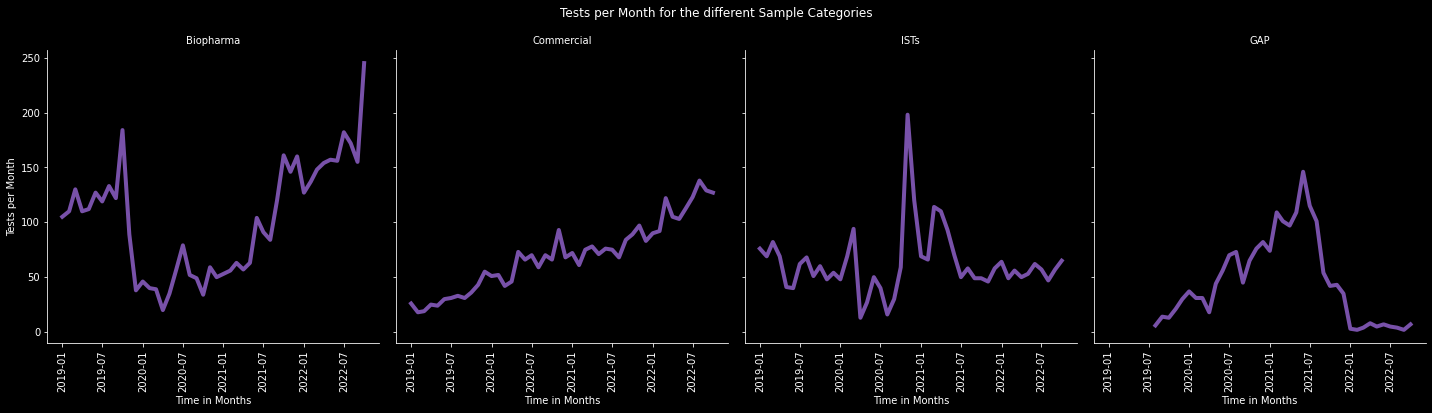

In [574]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = all_countries_by_type, x = "Year_Month", y = "Sales", kind = "line", col = "Type", color = "#7851a9", linewidth=4 )
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Tests per Month for the different Sample Categories', y=1.05)

plt.savefig('facet_plot.pdf', dpi = 300, bbox_inches ="tight",
            pad_inches = 1)
#files.download("facet_plot.pdf")
plt.show()


In [575]:
#Total sales across the region
total_sales_regions = top_x_sales.groupby(['Year_Month']).sum().reset_index()


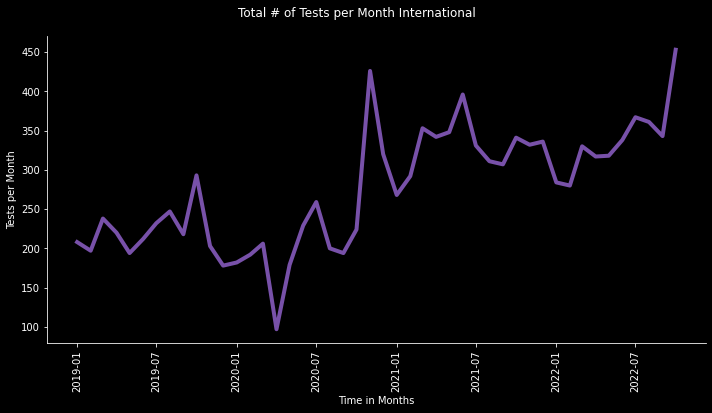

In [576]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = total_sales_regions, x = "Year_Month", y = "Sales", kind = "line", color = "#7851a9", linewidth=4 ,height=5, aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Total # of Tests per Month International', y=1.05)

plt.savefig('facet_plot.pdf', dpi = 300, bbox_inches ="tight",
            pad_inches = 1)
#files.download("facet_plot.pdf")
plt.show()

In [577]:
#Re-create the stacked area plot used so far


#Create a df in the wide format with the type category providing the new column labels

all_countries_pivot_type = all_countries_by_type.pivot(index = "Year_Month", columns = "Type", values = "Sales")
all_countries_pivot_type.head()


Type,Biopharma,Commercial,GAP,ISTs
Year_Month,,,,
2019-01-01,105.0,26.0,NaN,76.0
2019-02-01,110.0,18.0,NaN,69.0
2019-03-01,130.0,19.0,NaN,82.0
2019-04-01,110.0,25.0,NaN,69.0
2019-05-01,112.0,24.0,NaN,41.0


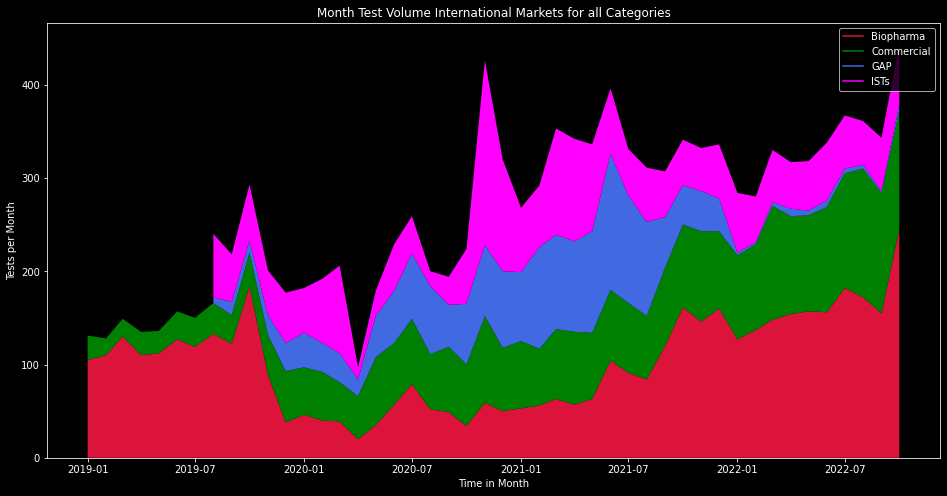

In [578]:
# Stackplot with X, Y, colors value
#plt.style.use('ggplot')
plt.subplots(figsize=(16, 8))


# Plot x-labels, y-label and data
plt.plot([], [], color ="crimson",
         label ="Biopharma")
plt.plot([], [], color ='green',
         label ='Commercial')
plt.plot([], [], color ='royalblue',
         label ='GAP')
plt.plot([], [], color ='magenta',
         label ='ISTs')


plt.stackplot(all_countries_pivot_type.index, all_countries_pivot_type["Biopharma"],
              all_countries_pivot_type["Commercial"],
              all_countries_pivot_type["GAP"],
              all_countries_pivot_type["ISTs"],
              colors =["crimson", 'green', 'royalblue', 'magenta'])
 
plt.grid(False)
plt.legend(loc='upper right')
# Days
plt.xlabel('Time in Month')
 
# No of hours
plt.ylabel('Tests per Month')
 
# Title of Graph
plt.title('Month Test Volume International Markets for all Categories')

 
# Displaying Graph


plt.savefig("test_t.pdf", transparent = True)
#files.download("test_t.pdf")
plt.show()

#### Stacked area plot for Commercial, GAP and ISTS

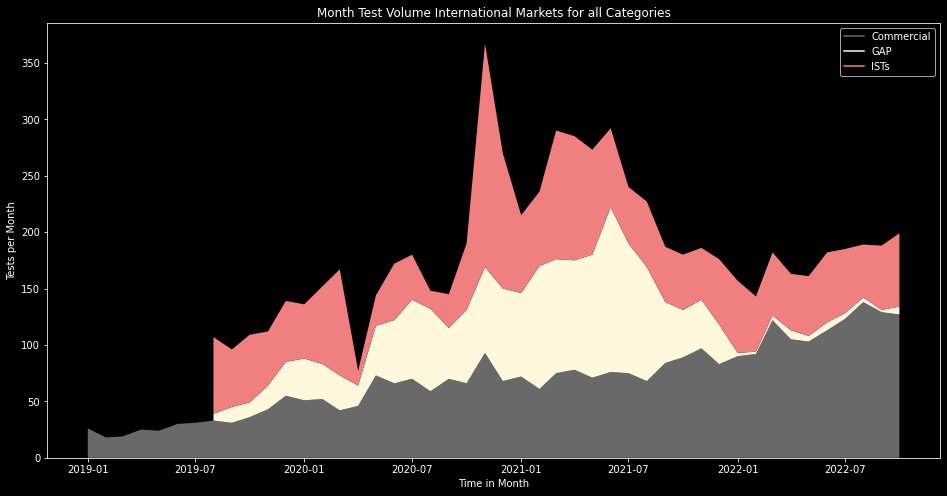

In [579]:
# Stackplot with X, Y, colors value
#plt.style.use('ggplot')
plt.subplots(figsize=(16, 8))


# Plot x-labels, y-label and data

plt.plot([], [], color ='dimgrey',
         label ='Commercial')
plt.plot([], [], color ='cornsilk',
         label ='GAP')
plt.plot([], [], color ='lightcoral',
         label ='ISTs')


plt.stackplot(all_countries_pivot_type.index,
              all_countries_pivot_type["Commercial"],
              all_countries_pivot_type["GAP"],
              all_countries_pivot_type["ISTs"],
              colors =['dimgrey', 'cornsilk', 'lightcoral'])
 
plt.grid(False)
plt.legend(loc='upper right')
# Days
plt.xlabel('Time in Month')
 
# No of hours
plt.ylabel('Tests per Month')
 
# Title of Graph
plt.title('Month Test Volume International Markets for all Categories')

 
# Displaying Graph
plt.show()

#### Plot the relative percentage of sample in each category over time

In [580]:
all_countries_pivot_type.head()

Type,Biopharma,Commercial,GAP,ISTs
Year_Month,,,,
2019-01-01,105.0,26.0,NaN,76.0
2019-02-01,110.0,18.0,NaN,69.0
2019-03-01,130.0,19.0,NaN,82.0
2019-04-01,110.0,25.0,NaN,69.0
2019-05-01,112.0,24.0,NaN,41.0


In [581]:
all_countries_pivot_type = all_countries_pivot_type.fillna(0)


In [582]:


all_countries_pivot_type["Total Sales"] = all_countries_pivot_type["Biopharma"] +all_countries_pivot_type["GAP"] + all_countries_pivot_type["Commercial"] + all_countries_pivot_type["ISTs"]

all_countries_pivot_type["Percent Commercial"] = (all_countries_pivot_type["Commercial"]/all_countries_pivot_type["Total Sales"])*100

all_countries_pivot_type["Percent Biopharma"] = (all_countries_pivot_type["Biopharma"]/all_countries_pivot_type["Total Sales"])*100

all_countries_pivot_type["Percent GAP"] = (all_countries_pivot_type["GAP"]/all_countries_pivot_type["Total Sales"])*100

all_countries_pivot_type["Percent ISTs"] = (all_countries_pivot_type["ISTs"]/all_countries_pivot_type["Total Sales"])*100


In [583]:
all_countries_pivot_type.head(2)

Type,Biopharma,Commercial,GAP,ISTs,Total Sales,Percent Commercial,Percent Biopharma,Percent GAP,Percent ISTs
Year_Month,,,,,,,,,
2019-01-01,105.0,26.0,0.0,76.0,207.0,12.56,50.72,0.0,36.71
2019-02-01,110.0,18.0,0.0,69.0,197.0,9.14,55.84,0.0,35.03


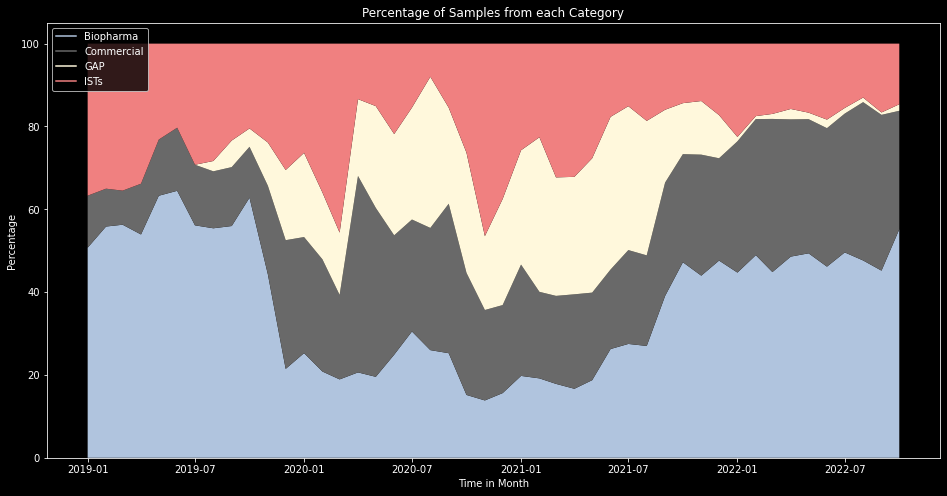

In [584]:
# Stackplot with X, Y, colors value
#plt.style.use('ggplot')
plt.subplots(figsize=(16, 8))


# Plot x-labels, y-label and data
plt.plot([], [], color ="lightsteelblue",
         label ="Biopharma")
plt.plot([], [], color ='dimgrey',
         label ='Commercial')
plt.plot([], [], color ='cornsilk',
         label ='GAP')
plt.plot([], [], color ='lightcoral',
         label ='ISTs')


plt.stackplot(all_countries_pivot_type.index, all_countries_pivot_type["Percent Biopharma"],
              all_countries_pivot_type["Percent Commercial"],
              all_countries_pivot_type["Percent GAP"],
              all_countries_pivot_type["Percent ISTs"],
              colors =["lightsteelblue", 'dimgrey', 'cornsilk', 'lightcoral'])
 
plt.grid(False)
plt.legend(loc='upper left')
# Days
plt.xlabel('Time in Month')
 
# No of hours
plt.ylabel('Percentage')
 
# Title of Graph
plt.title('Percentage of Samples from each Category')

 
# Displaying Graph
plt.show()

#### Add second y axis

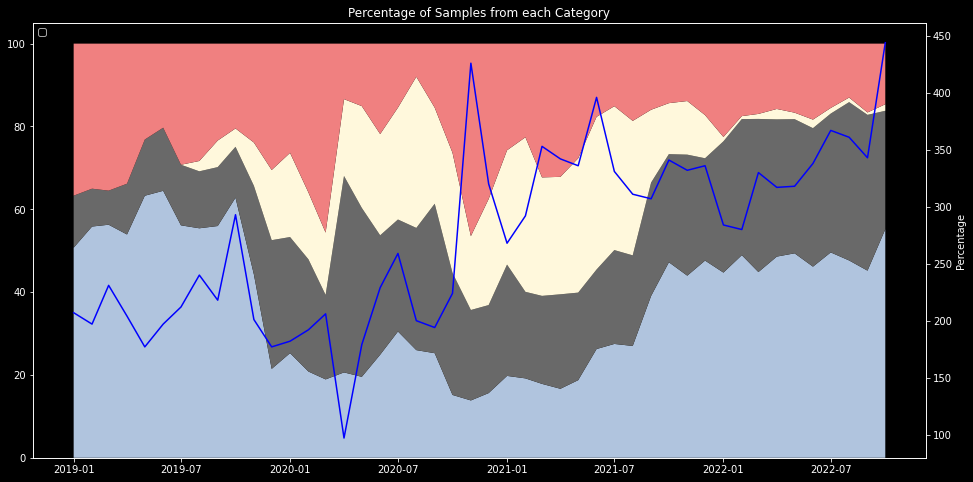

In [585]:
# Stackplot with X, Y, colors value
#plt.style.use('ggplot')


fig, ax = plt.subplots(1,1, figsize = (16, 8))

ax2 = ax.twinx()

# Plot x-labels, y-label and data
ax.plot([], [], color ="lightsteelblue",
         label ="Biopharma")
ax.plot([], [], color ='dimgrey',
         label ='Commercial')
ax.plot([], [], color ='cornsilk',
         label ='GAP')
ax.plot([], [], color ='lightcoral',
         label ='ISTs')


ax.stackplot(all_countries_pivot_type.index, all_countries_pivot_type["Percent Biopharma"],
              all_countries_pivot_type["Percent Commercial"],
              all_countries_pivot_type["Percent GAP"],
              all_countries_pivot_type["Percent ISTs"],
              colors =["lightsteelblue", 'dimgrey', 'cornsilk', 'lightcoral'])

ax2.plot(all_countries_pivot_type.index, all_countries_pivot_type["Total Sales"], color = 'b')
 
plt.grid(False)
plt.legend(loc='upper left')
# Days
plt.xlabel('Time in Month')
 
# No of hours
plt.ylabel('Percentage')
 
# Title of Graph
plt.title('Percentage of Samples from each Category')

 
# Displaying Graph
plt.show()

# Analysing the breakdown of commercial samples

In [586]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 0 to 3748
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Accession #            3749 non-null   object        
 1   Reporting Country      3749 non-null   object        
 2   Billing Type           3749 non-null   object        
 3   LIMS Project ID        3749 non-null   object        
 4   Account: Account Name  3749 non-null   object        
 5   Contact: Full Name     3749 non-null   object        
 6   Final Report Date      3715 non-null   object        
 7   Test Type              3749 non-null   object        
 8   Cancer Type            1256 non-null   object        
 9   Type                   3749 non-null   category      
 10  AE_supported           3749 non-null   object        
 11  Month                  3749 non-null   int64         
 12  Year                   3749 non-null   int64         
 13  Qua

In [587]:
#Select the time horizion to analyse
start_date_com = "2021-01-01"
end_date_com = "2022-10-31"
#Select the # of countries to be analyses based on the maxiumum number of samplesin 
#the time horizon
num_countries_comm = 6
#The the Year_Month columns as index to allow for easier slicing
df_merged = df_merged.set_index("Year_Month")
#Create the dataframe relevant for the time periode which should be analysed
df_merged_time_horizon = df_merged.loc[start_date_com:end_date_com].copy().reset_index()
print(f"The total number of samples in this dataframe is {df_merged_time_horizon.shape[0]}")

The total number of samples in this dataframe is 2534


In [588]:
df_merged_time_horizon["Reporting Country"].value_counts()

UNITED KINGDOM     1259
SPAIN               454
TURKEY              231
BRAZIL              215
CANADA               85
IRELAND              54
MEXICO               52
GERMANY              43
FINLAND              33
ITALY                24
CHILE                22
FRANCE               16
LITHUANIA             7
AUSTRIA               7
ROMANIA               5
GREECE                4
BELGIUM               4
COLOMBIA              4
ARGENTINA             3
SLOVENIA              3
SWITZERLAND           2
POLAND                2
COSTA RICA            1
NORTH MACEDONIA       1
LUXEMBOURG            1
PERU                  1
PORTUGAL              1
Name: Reporting Country, dtype: int64

In [589]:
#identiy the top commercial countries
df_merged_time_horizon["FOC"] = df_merged_time_horizon["FOC"].astype("string")

#Create the dataframe relevant for the time periode which should be analysed

print(f"The total number of samples in this dataframe is {df_merged_time_horizon.shape[0]}")


The total number of samples in this dataframe is 2534


In [590]:
df_merged_time_horizon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Year_Month             2534 non-null   datetime64[ns]
 1   Accession #            2534 non-null   object        
 2   Reporting Country      2534 non-null   object        
 3   Billing Type           2534 non-null   object        
 4   LIMS Project ID        2534 non-null   object        
 5   Account: Account Name  2534 non-null   object        
 6   Contact: Full Name     2534 non-null   object        
 7   Final Report Date      2532 non-null   object        
 8   Test Type              2534 non-null   object        
 9   Cancer Type            824 non-null    object        
 10  Type                   2534 non-null   category      
 11  AE_supported           2534 non-null   object        
 12  Month                  2534 non-null   int64         
 13  Yea

In [591]:
#Create a dataframe with just the topx countries by number of tests sold
top_comm_x = df_merged_time_horizon.groupby('Reporting Country').sum().sort_values("Sales",ascending = False).head(num_countries_comm)
top_comm_x_list = top_comm_x.index.tolist()
top_comm_x_sales =df_merged_time_horizon[df_merged_time_horizon['Reporting Country'].isin(top_comm_x_list)]
print(f"The top 5 countries have {top_comm_x_sales.shape[0]} samples which represents {top_comm_x_sales.shape[0]/df_merged_time_horizon.shape[0]:.2%}")

The top 5 countries have 2298 samples which represents 90.69%


In [592]:
top_comm_x_list

['UNITED KINGDOM', 'SPAIN', 'TURKEY', 'BRAZIL', 'CANADA', 'IRELAND']

In [593]:
#merged_top_x_countries = df_merged[df_merged['Reporting Country'].isin(top_comm_x_list)]
#merged_top_x_countries["Reporting Country"].value_counts()

In [594]:
list_for_FOC_analysis = [
 'Reporting Country',
 'Type',
 'Sales', 'FOC',
 'Year_Month']

In [595]:
#Create the main data frame for the further analysis
commercial_sales_FOC_analysis_df = top_comm_x_sales[list_for_FOC_analysis]
commercial_sales_FOC_analysis_df["FOC"] = commercial_sales_FOC_analysis_df["FOC"].astype("category")

#This is the main dataframe
commercial_sales_FOC_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2298 entries, 1 to 2533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Reporting Country  2298 non-null   object        
 1   Type               2298 non-null   category      
 2   Sales              2298 non-null   int64         
 3   FOC                2298 non-null   category      
 4   Year_Month         2298 non-null   datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(1), object(1)
memory usage: 76.6+ KB


In [596]:
commercial_sales_FOC_analysis_df["FOC"].value_counts()

Paid    1823
Free     475
Name: FOC, dtype: int64

In [597]:
FOC_df = commercial_sales_FOC_analysis_df.groupby(['Year_Month','Reporting Country', "FOC"]).sum().reset_index()
FOC_df.tail()


,Year_Month,Reporting Country,FOC,Sales
259,2022-10-01,SPAIN,Paid,17
260,2022-10-01,TURKEY,Free,0
261,2022-10-01,TURKEY,Paid,17
262,2022-10-01,UNITED KINGDOM,Free,27
263,2022-10-01,UNITED KINGDOM,Paid,52


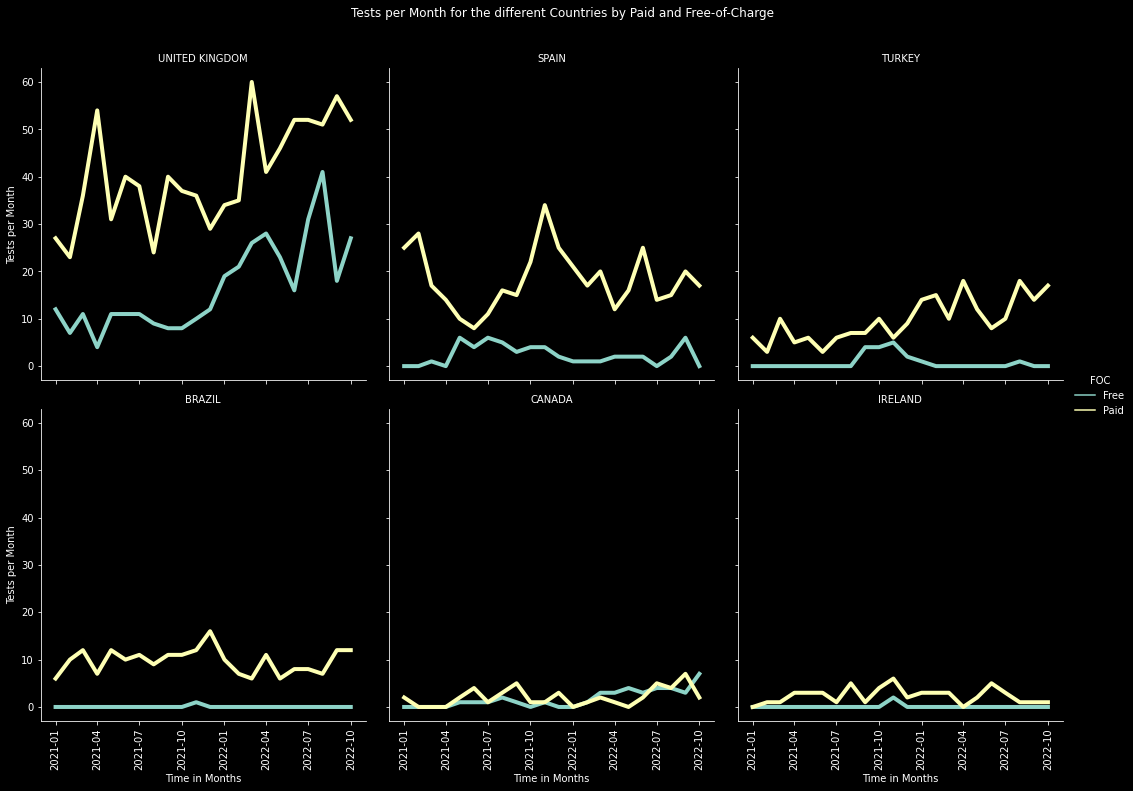

In [598]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = FOC_df, x = "Year_Month", y = "Sales", kind = "line", hue = "FOC", col = "Reporting Country", color = "#7851a9", linewidth=4 , ci = None, col_wrap = 3
                ,col_order = top_comm_x_list
                )
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Tests per Month for the different Countries by Paid and Free-of-Charge', y=1.05)

plt.savefig('comm.pdf', dpi = 300, bbox_inches ="tight",
            pad_inches = 1)
#files.download("comm.pdf")
plt.show()


In [599]:
#Total sales
all_countries_comm = commercial_sales_FOC_analysis_df.groupby(['Year_Month', "FOC"]).sum().reset_index()
all_countries_comm.sample(3)

,Year_Month,FOC,Sales
0,2021-01-01,Free,12
30,2022-04-01,Free,33
39,2022-08-01,Paid,96


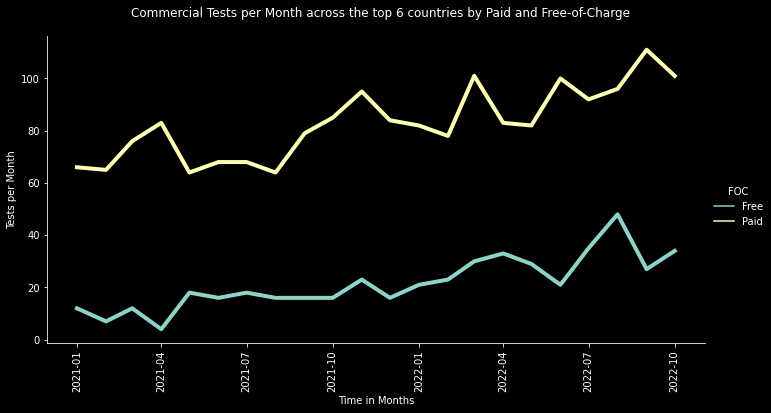

In [600]:
#Plot the sales for each category over time
with mpl.rc_context({'axes.grid': False}): 
  g = sns.relplot(data = all_countries_comm , x = "Year_Month", y = "Sales", kind = "line", hue = "FOC",  color = "#7851a9", linewidth=4 , 
                ci = None, height=5, aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"Commercial Tests per Month across the top {num_countries_comm} countries by Paid and Free-of-Charge", y=1.05)

plt.savefig('comm_all.pdf', dpi = 300, bbox_inches ="tight",
            pad_inches = 1)
#files.download("comm_all.pdf")
plt.show()

In [601]:
#All Commercial cases including free
all_countries_incl_free = commercial_sales_FOC_analysis_df.groupby(['Year_Month']).sum().reset_index()
all_countries_incl_free.head()

,Year_Month,Sales
0,2021-01-01,78
1,2021-02-01,72
2,2021-03-01,88
3,2021-04-01,87
4,2021-05-01,82


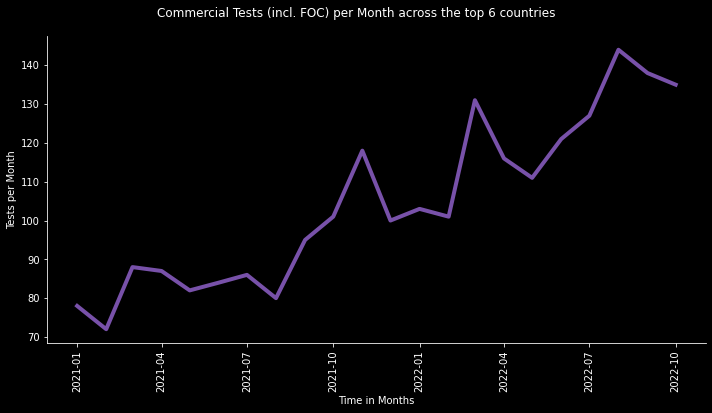

In [602]:
#Plot the sales for each category over time
g = sns.relplot(data = all_countries_incl_free  , x = "Year_Month", y = "Sales", kind = "line",  color = "#7851a9", linewidth=4 , 
                ci = None, height=5, aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"Commercial Tests (incl. FOC) per Month across the top {num_countries_comm} countries", y=1.05)

plt.savefig('comm_all_with_FOC.pdf', dpi = 300, bbox_inches ="tight",
            pad_inches = 1)
#files.download("comm_all_with_FOC.pdf")
plt.show()

# Rolling Mean Analysis

In [603]:

commercial_sales_rolling_df = commercial_sales_FOC_analysis_df.groupby(["Year_Month"])["Sales"].sum().reset_index()

In [604]:
commercial_sales_rolling_df["Rolling 3-Month Average"] = commercial_sales_rolling_df["Sales"].rolling(3).mean()

In [605]:
commercial_sales_rolling_df.head()

,Year_Month,Sales,Rolling 3-Month Average
0,2021-01-01,78,NaN
1,2021-02-01,72,NaN
2,2021-03-01,88,79.33
3,2021-04-01,87,82.33
4,2021-05-01,82,85.67


In [606]:
melt = commercial_sales_rolling_df.melt(id_vars = "Year_Month", value_vars = ["Sales", "Rolling 3-Month Average"], value_name= "Smoothed Sales")

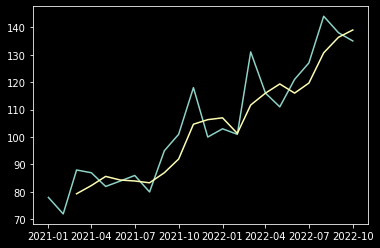

In [607]:
fig, ax = plt.subplots()
ax.plot(commercial_sales_rolling_df["Year_Month"],commercial_sales_rolling_df["Sales"])
ax.plot(commercial_sales_rolling_df["Year_Month"],commercial_sales_rolling_df["Rolling 3-Month Average"])
plt.show()

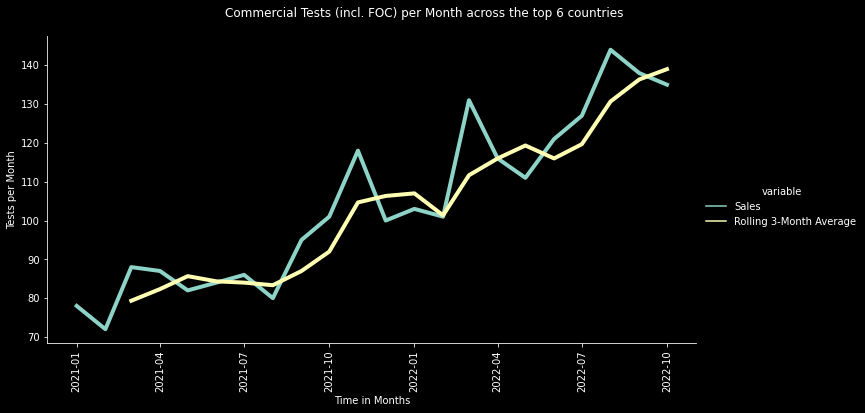

In [608]:
#Plot the sales for each category over time

g = sns.relplot(data = melt  , x = "Year_Month", y = "Smoothed Sales", hue = "variable", kind = "line",  color = "#7851a9",
                linewidth=4 , 
                ci = None, height=5, aspect=10/5)

g.set_xticklabels(rotation = "90")

g.set_ylabels("Tests per Month")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"Commercial Tests (incl. FOC) per Month across the top {num_countries_comm} countries", y=1.05)

#plt.savefig('comm_all_with_FOC.pdf', dpi = 300, bbox_inches ="tight",
            #pad_inches = 1)
#files.download("comm_all_with_FOC.pdf")
plt.show()

# Percentages growth

In [609]:
commercial_sales_FOC_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2298 entries, 1 to 2533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Reporting Country  2298 non-null   object        
 1   Type               2298 non-null   category      
 2   Sales              2298 non-null   int64         
 3   FOC                2298 non-null   category      
 4   Year_Month         2298 non-null   datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(1), object(1)
memory usage: 76.6+ KB


In [610]:
commercial_sales_FOC_analysis_df.head()

,Reporting Country,Type,Sales,FOC,Year_Month
1,UNITED KINGDOM,Commercial,1,Paid,2022-05-01
3,SPAIN,Commercial,1,Paid,2021-11-01
4,SPAIN,Commercial,1,Paid,2021-12-01
5,TURKEY,Commercial,1,Paid,2022-01-01
6,SPAIN,Commercial,1,Paid,2022-02-01


In [611]:
#Creat a data set with the monthly revenue for all countries, Calcualte the percent growth by using the percent_change function
commercial_percent = commercial_sales_FOC_analysis_df.groupby(["Year_Month"]).sum().reset_index().set_index("Year_Month")

In [612]:
commercial_percent

,Sales
Year_Month,
2021-01-01,78
2021-02-01,72
2021-03-01,88
2021-04-01,87
2021-05-01,82
2021-06-01,84
2021-07-01,86
2021-08-01,80
2021-09-01,95


In [613]:
commercial_percent["Annual_Growth(%)"] = commercial_percent.pct_change(periods = 12).mul(100)

In [614]:
commercial_percent.tail()

,Sales,Annual_Growth(%)
Year_Month,,
2022-06-01,121,44.05
2022-07-01,127,47.67
2022-08-01,144,80.00
2022-09-01,138,45.26
2022-10-01,135,33.66


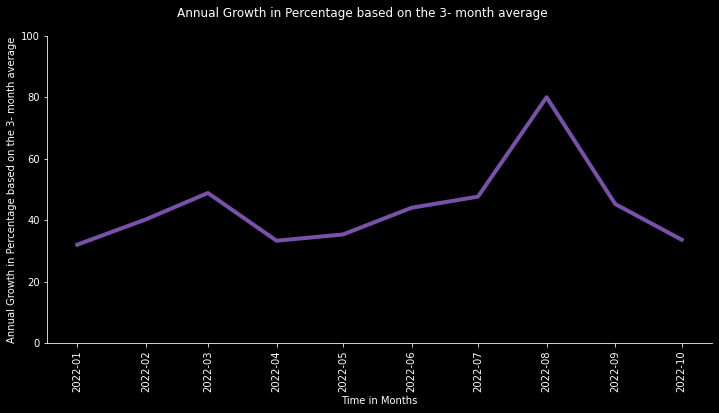

In [615]:
#Plot the sales for each category over time
g = sns.relplot(data = commercial_percent  , x = "Year_Month", y = "Annual_Growth(%)", kind = "line",  color = "#7851a9", linewidth=4 , 
                ci = None, height=5, aspect=10/5)
g.set_xticklabels(rotation = "90")

g.set(ylim = (0,100))
g.set_ylabels("Annual Growth in Percentage based on the 3- month average")
g.set_xlabels("Time in Months")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle(f"Annual Growth in Percentage based on the 3- month average", y=1.05)

#plt.savefig('comm_all_with_FOC.pdf', dpi = 300, bbox_inches ="tight",
            #pad_inches = 1)
#files.download("comm_all_with_FOC.pdf")
plt.show()

In [616]:
#Calculate the percentage growth based on the 3 month rolling mean
commercial_sales_rolling_df["Percent_growth_3_month_average"] = commercial_sales_rolling_df.set_index("Year_Month")["Rolling 3-Month Average"].pct_change(periods=6).mul(100)

In [617]:
commercial_sales_rolling_df

,Year_Month,Sales,Rolling 3-Month Average,Percent_growth_3_month_average
0,2021-01-01,78,NaN,NaN
1,2021-02-01,72,NaN,NaN
2,2021-03-01,88,79.33,NaN
3,2021-04-01,87,82.33,NaN
4,2021-05-01,82,85.67,NaN
5,2021-06-01,84,84.33,NaN
6,2021-07-01,86,84.00,NaN
7,2021-08-01,80,83.33,NaN
8,2021-09-01,95,87.00,NaN
9,2021-10-01,101,92.00,NaN


# Charts for Rev Core

In [618]:
# Chart with Commercial and paid ISTs

In [619]:
# Chart 